In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.under_sampling import RandomUnderSampler, NearMiss, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, CondensedNearestNeighbour
from sklearn.inspection import partial_dependence

In [2]:
# combined data
# load processed data
train_mean = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_mean_mode.csv')
train_latest = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_latest.csv')
train_dispers = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_entropy_std.csv')
train_min = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_min.csv')
train_max = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_max.csv')
train_q1 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_q1.csv')
train_q3 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_q3.csv')
train_kurtosis = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_kurtosis.csv')
train_skewness = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_skewness.csv')
train_range = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_range.csv')
train_iqr = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_iqr.csv')
train_latest = train_latest.drop(train_latest.columns[0:13], axis=1)
train_dispers = train_dispers.drop(train_dispers.columns[0:13], axis=1)
train_min = train_min.drop(train_min.columns[0:13], axis=1)
train_max = train_max.drop(train_max.columns[0:13], axis=1)
train_q1 = train_q1.drop(train_q1.columns[0:13], axis=1)
train_q3 = train_q3.drop(train_q3.columns[0:13], axis=1)
train_kurtois = train_kurtosis.drop(train_kurtosis.columns[0:13], axis=1)
train_skewness = train_skewness.drop(train_skewness.columns[0:13], axis=1)
train_range = train_range.drop(train_range.columns[0:13], axis=1)
train_iqr = train_iqr.drop(train_iqr.columns[0:13], axis=1)

# merge train_ and train_latest
train = pd.concat([train_mean, train_latest, train_dispers, train_min, train_max], axis=1)

# load processed data
test_mean = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_mean_mode.csv')
test_latest = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_latest.csv')
test_dispers = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_entropy_std.csv')
test_min = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_min.csv')
test_max = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_max.csv')
test_q1 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_q1.csv')
test_q3 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_q3.csv')
test_kurtosis = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_kurtosis.csv')
test_skewness = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_skewness.csv')
test_range = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_range.csv')
test_iqr = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_iqr.csv')
test_latest = test_latest.drop(test_latest.columns[0:12], axis=1)
test_dispers = test_dispers.drop(test_dispers.columns[0:12], axis=1)
test_min = test_min.drop(test_min.columns[0:12], axis=1)
test_max = test_max.drop(test_max.columns[0:12], axis=1)
test_q1 = test_q1.drop(test_q1.columns[0:12], axis=1)
test_q3 = test_q3.drop(test_q3.columns[0:12], axis=1)
test_kurtosis = test_kurtosis.drop(test_kurtosis.columns[0:12], axis=1)
test_skewness = test_skewness.drop(test_skewness.columns[0:12], axis=1)
test_range = test_range.drop(test_range.columns[0:12], axis=1)
test_iqr = test_iqr.drop(test_iqr.columns[0:12], axis=1)

# merge train_mean and train_latest
test = pd.concat([test_mean, test_latest, test_dispers, test_min, test_max], axis=1)

train = train.drop(train.columns[11], axis=1)
test = test.drop(test.columns[11], axis=1)

In [3]:
x_train = train.iloc[:,12:]
y_train = train.iloc[:,11]
x_test = test.iloc[:,11:]

# Extra trees

In [48]:
extra_trees = ExtraTreesClassifier(class_weight="balanced", n_estimators=900, min_samples_leaf=2, min_samples_split=2, max_features=0.1, max_depth=300, random_state=42)
extra_trees.fit(x_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=300, max_features=0.1,
                     min_samples_leaf=2, n_estimators=900, random_state=42)

In [49]:
y_valid_scores = extra_trees.predict_proba(x_test)[:, 1]

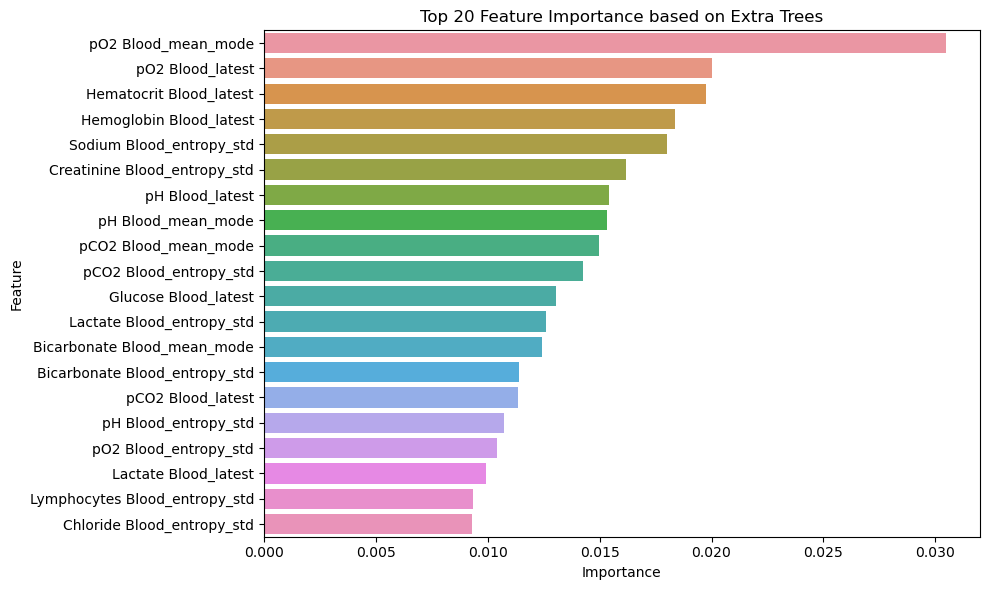

In [140]:
#plot feature importance based on extra trees (only top 20 features)
feature_importance = pd. DataFrame()
feature_importance[ 'Feature'] = x_train.columns
feature_importance['Importance'] = extra_trees.feature_importances_
feature_importance = feature_importance.sort_values (by='Importance', ascending=False).head (20)
feature_importance = feature_importance. reset_index (drop=True)
plt. figure(figsize=(10, 6))
sns.barplot (x= 'Importance', y= 'Feature', data=feature_importance)
plt.title('Top 20 Feature Importance based on Extra Trees')
plt.tight_layout ()

In [120]:
extra_tree_top_20_features_list = feature_importance['Feature'].tolist()
print(extra_tree_top_20_features_list)

['pO2 Blood_mean_mode', 'pO2 Blood_latest', 'Hematocrit Blood_latest', 'Hemoglobin Blood_latest', 'Sodium Blood_entropy_std', 'Creatinine Blood_entropy_std', 'pH Blood_latest', 'pH Blood_mean_mode', 'pCO2 Blood_mean_mode', 'pCO2 Blood_entropy_std', 'Glucose Blood_latest', 'Lactate Blood_entropy_std', 'Bicarbonate Blood_mean_mode', 'Bicarbonate Blood_entropy_std', 'pCO2 Blood_latest', 'pH Blood_entropy_std', 'pO2 Blood_entropy_std', 'Lactate Blood_latest', 'Lymphocytes Blood_entropy_std', 'Chloride Blood_entropy_std']


In [121]:
# trail for remove suffix

remove_suffix_feature_importance = pd. DataFrame()
remove_suffix_feature_importance[ 'Feature'] = x_train.columns
remove_suffix_feature_importance['Importance'] = extra_trees.feature_importances_
suffixes = ['_latest', '_entropy_std', '_mean_mode', '_min', '_max']
pattern = '|'.join(suffixes)
remove_suffix_feature_importance['Feature'] = remove_suffix_feature_importance['Feature'].str.replace(pattern, '', regex=True)
remove_suffix_feature_importance = remove_suffix_feature_importance.loc[remove_suffix_feature_importance.groupby('Feature')['Importance'].idxmax()]
extra_tree_top_20_features_df = remove_suffix_feature_importance.sort_values(by='Importance', ascending=False).head(20)
remove_suffix_extra_tree_top_20_features_list = extra_tree_top_20_features_df['Feature'].tolist()
print(remove_suffix_extra_tree_top_20_features_list)

['pO2 Blood', 'Hematocrit Blood', 'Hemoglobin Blood', 'Sodium Blood', 'Creatinine Blood', 'pH Blood', 'pCO2 Blood', 'Glucose Blood', 'Lactate Blood', 'Bicarbonate Blood', 'Lymphocytes Blood', 'Chloride Blood', 'age', 'Platelet Count Blood', 'Neutrophils Blood', 'Calcium, Total Blood', 'Anion Gap Blood', 'Potassium Blood', 'gender', 'Troponin T Blood']


In [41]:
from sklearn.linear_model import LogisticRegression
lr_best = LogisticRegression(C=31.845593832735297, penalty='l2', solver='liblinear', max_iter=100)
lr_best.fit(x_train, y_train)


LogisticRegression(C=31.845593832735297, solver='liblinear')

In [122]:
# Sort the DataFrame by the absolute values of the coefficients in ascending order and get the top 20
coefficients_df = pd.DataFrame()
coefficients_df['Feature'] = x_train.columns
coefficients_df['Coefficient'] = lr_best.coef_[0]
coefficients_df['abs_coefficient'] = coefficients_df['Coefficient'].abs()
logistic_top_20_features_df = coefficients_df.sort_values(by='abs_coefficient', ascending=False).head(20)
print(logistic_top_20_features_df)

                                 Feature  Coefficient  abs_coefficient
275           Lymphocytes Pleural_latest     2.771032         2.771032
350  Eosinophils Joint Fluid_entropy_std     2.581109         2.581109
160                       G30-G32_latest    -2.543738         2.543738
68                     G30-G32_mean_mode    -2.543738         2.543738
57         Eosinophils Pleural_mean_mode    -2.248030         2.248030
224                       E50-E64_latest    -1.963131         1.963131
132                    E50-E64_mean_mode    -1.963131         1.963131
251                 Lactate Blood_latest    -1.919938         1.919938
109                    F20-F29_mean_mode    -1.876706         1.876706
201                       F20-F29_latest    -1.876706         1.876706
123                    N17-N19_mean_mode     1.730718         1.730718
215                       N17-N19_latest     1.730718         1.730718
255           Eosinophils Ascites_latest     1.715340         1.715340
61    

In [142]:
logistic_top_20_features_df.to_excel('logistic_top_20_features.xlsx', index=False)

In [123]:
# Extract the index into a list
logistic_top_20_features_list = logistic_top_20_features_df["Feature"].tolist()
print(logistic_top_20_features_list)

['Lymphocytes Pleural_latest', 'Eosinophils Joint Fluid_entropy_std', 'G30-G32_latest', 'G30-G32_mean_mode', 'Eosinophils Pleural_mean_mode', 'E50-E64_latest', 'E50-E64_mean_mode', 'Lactate Blood_latest', 'F20-F29_mean_mode', 'F20-F29_latest', 'N17-N19_mean_mode', 'N17-N19_latest', 'Eosinophils Ascites_latest', 'Basophils Blood_mean_mode', 'Y90-Y99_mean_mode', 'Y90-Y99_latest', 'Lymphocytes Pleural_entropy_std', 'Eosinophils Other Body Fluid_latest', 'G35-G37_latest', 'G35-G37_mean_mode']


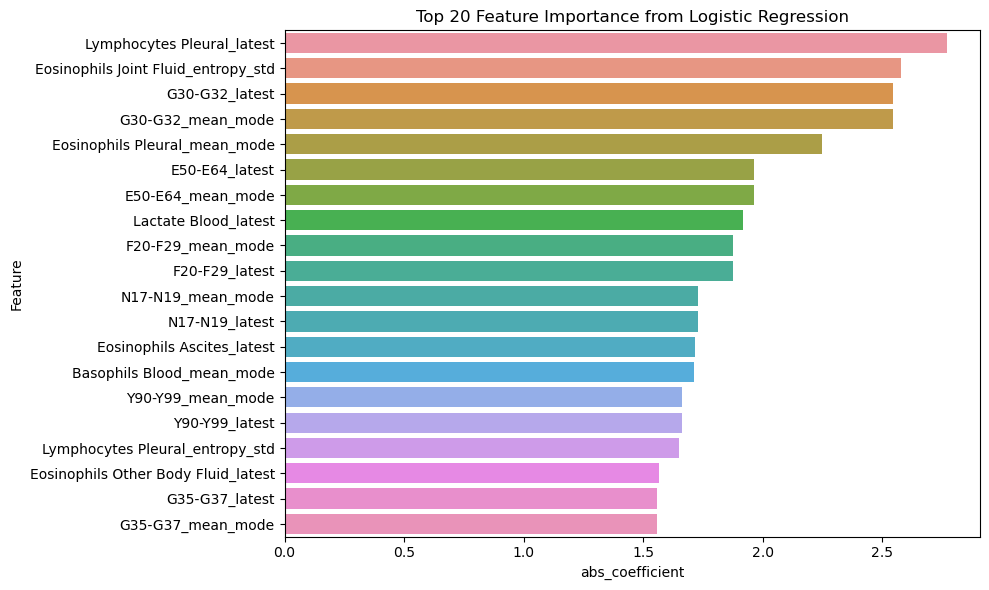

In [124]:
# Plot the top 20 features
logistic_top_20_features_df = logistic_top_20_features_df.reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='abs_coefficient', y='Feature', data=logistic_top_20_features_df)
plt.title('Top 20 Feature Importance from Logistic Regression')
plt.tight_layout()

In [89]:
# # Compute the odds ratios
# coefficients_df = pd.DataFrame()
# coefficients_df['Feature'] = x_train.columns
# coefficients_df['Coefficient'] = lr_best.coef_[0]
# coefficients_df['Odds Ratio'] = np.exp(coefficients_df['Coefficient'])
# logistic_odds_ratio = coefficients_df.sort_values(by='Odds Ratio', ascending=False)
# top_10 = logistic_odds_ratio.head(10)
# bottom_10 = logistic_odds_ratio.tail(10)
# logistic_odds_ratio = pd.concat([top_10, bottom_10])
# print(logistic_odds_ratio)

In [132]:
# Remove_suffix
import re
remove_suffix_coefficients_df=coefficients_df.copy()
remove_suffix_coefficients_df['Feature'] = remove_suffix_coefficients_df['Feature'].str.replace(pattern, '', regex=True)
remove_suffix_coefficients_df['abs_coefficient'] = remove_suffix_coefficients_df['Coefficient'].abs()
remove_suffix_coefficients_df = remove_suffix_coefficients_df.loc[remove_suffix_coefficients_df.groupby('Feature')['abs_coefficient'].idxmax()]
remove_suffix_logistic_top_20_features_df = remove_suffix_coefficients_df.sort_values(by='abs_coefficient', ascending=False).head(20)
remove_suffix_logistic_top_20_features_list = remove_suffix_logistic_top_20_features_df['Feature'].tolist()
print(remove_suffix_logistic_top_20_features_list)

['Lymphocytes Pleural', 'Eosinophils Joint Fluid', 'G30-G32', 'Eosinophils Pleural', 'E50-E64', 'Lactate Blood', 'F20-F29', 'N17-N19', 'Eosinophils Ascites', 'Basophils Blood', 'Y90-Y99', 'Eosinophils Other Body Fluid', 'G35-G37', 'Monocytes Ascites', 'J60-J70', 'Lymphocytes Ascites', 'H Blood', 'E89-E89', 'G00-G09', 'pO2 Blood']


In [87]:
# # Remove the suffixes from logistic_odds_ratio
# import re
# suffixes = ['_latest', '_entropy_std', '_mean_mode', '_min', '_max']
# pattern = '|'.join(suffixes)
# top_20_features_list = [re.sub(pattern, '', feature) for feature in top_20_features_list]
# feature_names = [re.sub(pattern, '', feature) for feature in feature_names]
# print(top_20_features_list)
# print(feature_names)

['Lymphocytes Pleural', 'Eosinophils Joint Fluid', 'G30-G32', 'G30-G32', 'Eosinophils Pleural', 'E50-E64', 'E50-E64', 'Lactate Blood', 'F20-F29', 'F20-F29', 'N17-N19', 'N17-N19', 'Eosinophils Ascites', 'Basophils Blood', 'Y90-Y99', 'Y90-Y99', 'Lymphocytes Pleural', 'Eosinophils Other Body Fluid', 'G35-G37', 'G35-G37']
['pO2 Blood', 'pO2 Blood', 'Hematocrit Blood', 'Hemoglobin Blood', 'Sodium Blood', 'Creatinine Blood', 'pH Blood', 'pH Blood', 'pCO2 Blood', 'pCO2 Blood', 'Glucose Blood', 'Lactate Blood', 'Bicarbonate Blood', 'Bicarbonate Blood', 'pCO2 Blood', 'pH Blood', 'pO2 Blood', 'Lactate Blood', 'Lymphocytes Blood', 'Chloride Blood']


In [131]:
remove_suffix_extra_tree_top_20_features_list

['pO2 Blood',
 'Hematocrit Blood',
 'Hemoglobin Blood',
 'Sodium Blood',
 'Creatinine Blood',
 'pH Blood',
 'pCO2 Blood',
 'Glucose Blood',
 'Lactate Blood',
 'Bicarbonate Blood',
 'Lymphocytes Blood',
 'Chloride Blood',
 'age',
 'Platelet Count Blood',
 'Neutrophils Blood',
 'Calcium, Total Blood',
 'Anion Gap Blood',
 'Potassium Blood',
 'gender',
 'Troponin T Blood']

In [133]:
remove_suffix_logistic_top_20_features_list

['Lymphocytes Pleural',
 'Eosinophils Joint Fluid',
 'G30-G32',
 'Eosinophils Pleural',
 'E50-E64',
 'Lactate Blood',
 'F20-F29',
 'N17-N19',
 'Eosinophils Ascites',
 'Basophils Blood',
 'Y90-Y99',
 'Eosinophils Other Body Fluid',
 'G35-G37',
 'Monocytes Ascites',
 'J60-J70',
 'Lymphocytes Ascites',
 'H Blood',
 'E89-E89',
 'G00-G09',
 'pO2 Blood']

In [134]:
# remove_suffix_common_feature
common_features_remove_suffix = set(remove_suffix_logistic_top_20_features_list).intersection(remove_suffix_extra_tree_top_20_features_list)
common_features_remove_suffix = list(common_features_remove_suffix)
print(common_features_remove_suffix)

['Lactate Blood', 'pO2 Blood']


# Test if model fit well

In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Predict the classes using cross-validation
y_pred = cross_val_predict(lr_best, x_train, y_train, cv=5)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

print(cm)

[[9346  218]
 [1352  680]]


In [58]:
from sklearn.metrics import classification_report

# Compute the classification report
cr = classification_report(y_train, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      9564
           1       0.76      0.33      0.46      2032

    accuracy                           0.86     11596
   macro avg       0.82      0.66      0.69     11596
weighted avg       0.85      0.86      0.84     11596



In [141]:
import pandas as pd
from sklearn.metrics import classification_report

# Compute the classification report
cr = classification_report(y_train, y_pred, output_dict=True)

# Convert to DataFrame
cr_df = pd.DataFrame(cr).transpose()

# Output as Excel
cr_df.to_excel('classification_report.xlsx')

In [139]:
import pandas as pd
from sklearn.metrics import classification_report

# Compute the classification report
cr = classification_report(y_train, y_pred, output_dict=True)

# Convert to DataFrame
cr_df = pd.DataFrame(cr).transpose()

# Display the DataFrame
print(cr_df)

              precision    recall  f1-score       support
0              0.873621  0.977206  0.922515   9564.000000
1              0.757238  0.334646  0.464164   2032.000000
accuracy       0.864608  0.864608  0.864608      0.864608
macro avg      0.815430  0.655926  0.693339  11596.000000
weighted avg   0.853227  0.864608  0.842197  11596.000000


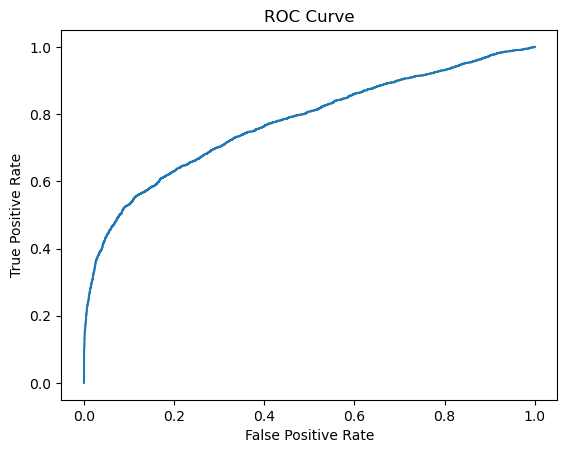

AUC:  0.7752693108507295


In [59]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = cross_val_predict(lr_best, x_train, y_train, cv=5, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
auc = roc_auc_score(y_train, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('AUC: ', auc)

In [60]:
from sklearn.metrics import log_loss
# Compute the log loss
ll = log_loss(y_train, y_pred_prob)

print('Log Loss: ', ll)

Log Loss:  0.3696007314398399


/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


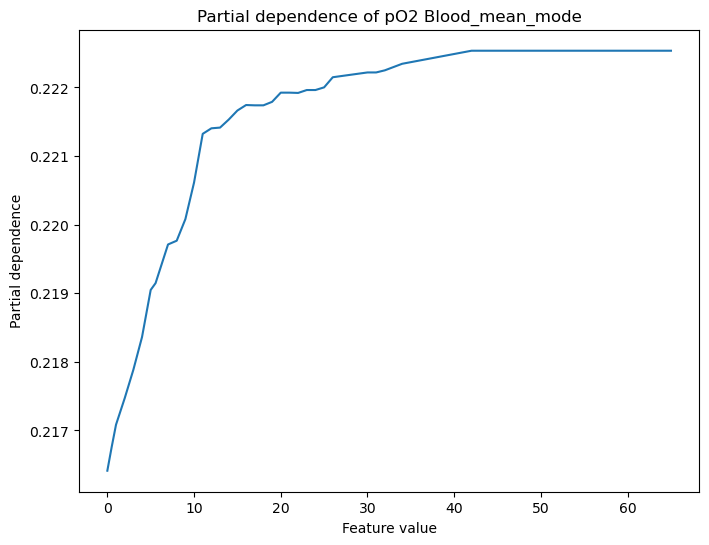

In [137]:
feature_indices = [0]

# Compute partial dependence 
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {extra_tree_top_20_features_list[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()

/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


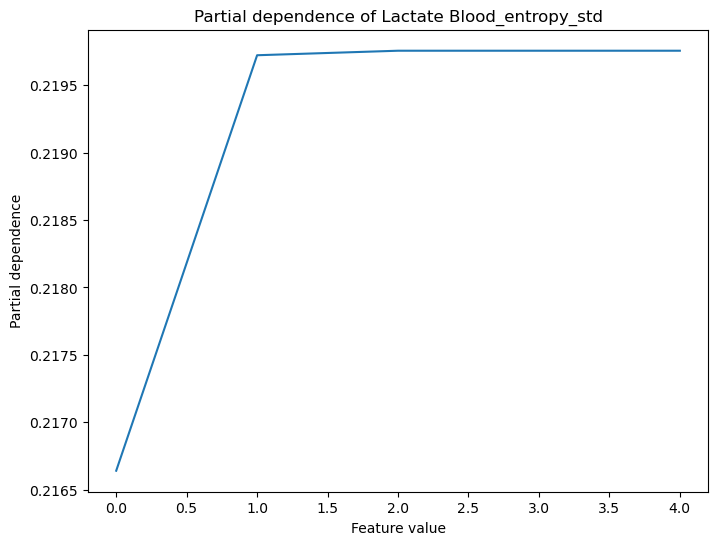

In [138]:
feature_indices = [11]
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {extra_tree_top_20_features_list[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()

/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


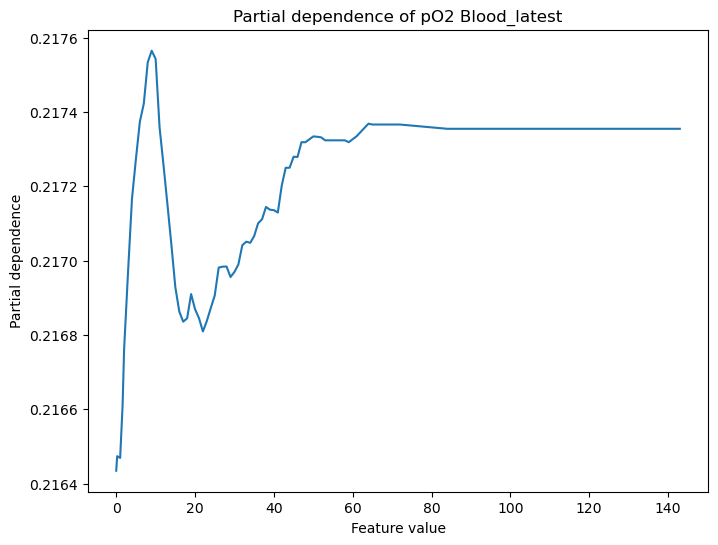

In [47]:
feature_indices = [1]
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {extra_tree_top_20_features_list[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()

/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


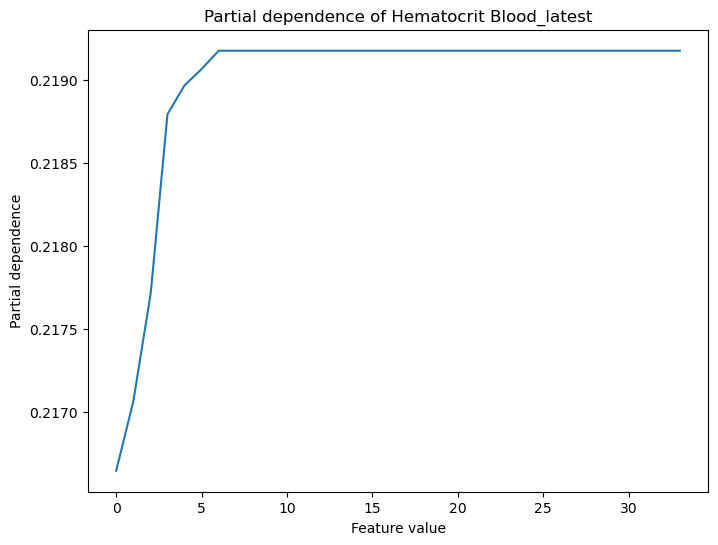

In [48]:
feature_indices = [2]
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {extra_tree_top_20_features_list[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()

/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


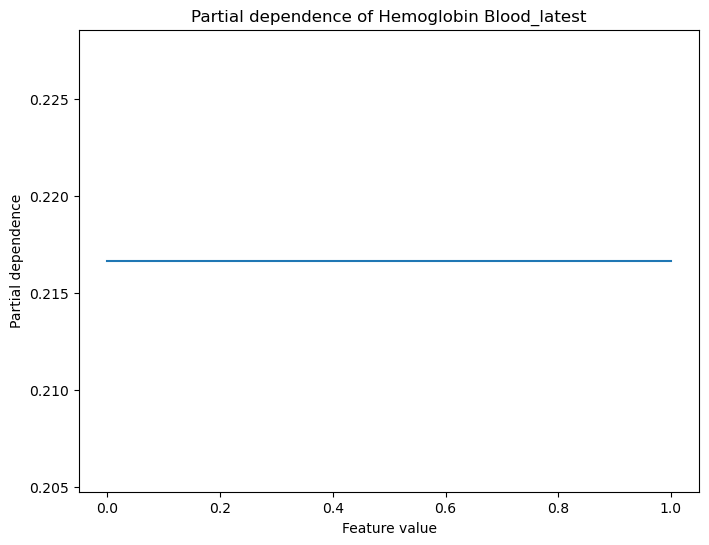

In [49]:
feature_indices = [3]
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {extra_tree_top_20_features_list[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()

/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


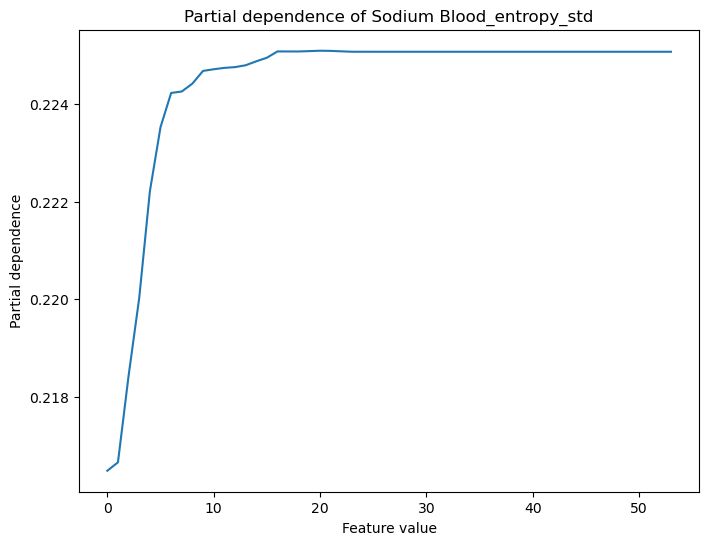

In [50]:
feature_indices = [4]
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {extra_tree_top_20_features_list[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()

/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


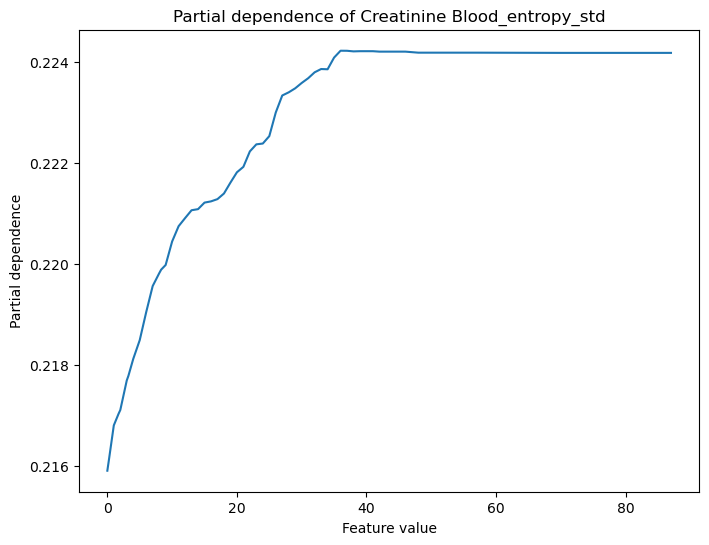

In [51]:
feature_indices = [5]
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {extra_tree_top_20_features_list[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()